Sanvicente Perez Angel David

5AV1

Ciencia de datos

14 de dic 2024

En este codigo lo que se hace es explorar dos datasets.
El primero se utilizara para buscar la correlacion entre las dimensiones especificadas y el segundo para buscar asociaciones utilizando la prueba chi-cuadrada.

El codigo se divide en 3 secciones generales y estan ordenados lo que quiere decir es que para su correcto funcionaiento se debe ejecutar las celdas en orden cronologico

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, kendalltau

# Carga y exploracion de datos

In [27]:
#cargar el conjunto de datos y obtener el total de datos y columnas que contiene
correlacion=pd.read_csv('/content/bank.csv',delimiter=';')
correlacion.shape

(4521, 17)

In [28]:
correlacion.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [55]:
#cantidad de valores nulos y porcentaje que representa
nulos=pd.DataFrame({
    'tipo de datos':correlacion.dtypes,
    'nulos':correlacion.isnull().sum(),
    'porcentaje':(correlacion.isnull().mean()*100).map(lambda x: f'{x:.2f}%'),
    'duplicados': correlacion.apply(lambda x: x.duplicated().sum())


})
nulos

,tipo de datos,nulos,porcentaje,duplicados
age,int64,0,0.00%,4454
job,object,0,0.00%,4509
marital,object,0,0.00%,4518
education,object,0,0.00%,4517
default,object,0,0.00%,4519
balance,int64,0,0.00%,2168
housing,object,0,0.00%,4519
loan,object,0,0.00%,4519
contact,object,0,0.00%,4518
day,int64,0,0.00%,4490


In [56]:
#cargar el conjunto de datos y obtener el total de datos y columnas que contiene
independencia=pd.read_csv('/content/facies_vectors.csv')
independencia.shape

(4149, 11)

In [57]:
independencia.head(3)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957


In [58]:
#cantidad de valores nulos y porcentaje que representa
nulos=pd.DataFrame({
    'tipo de datos':independencia.dtypes,
    'nulos':independencia.isnull().sum(),
    'porcentaje':(independencia.isnull().mean()*100).map(lambda x: f'{x:.2f}%'),
    'duplicados': independencia.apply(lambda x: x.duplicated().sum())


})
nulos

,tipo de datos,nulos,porcentaje,duplicados
Facies,int64,0,0.00%,4140
Formation,object,0,0.00%,4135
Well Name,object,0,0.00%,4139
Depth,float64,0,0.00%,3019
GR,float64,0,0.00%,588
ILD_log10,float64,0,0.00%,2762
DeltaPHI,float64,0,0.00%,2742
PHIND,float64,0,0.00%,1533
PE,float64,917,22.10%,3153
NM_M,int64,0,0.00%,4147


In [42]:
independencia.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [31]:
correlacion.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#Correlacion

##usando scipy

In [32]:
# Variables a analizar
variables = ["age", "balance", "duration", "campaign", "previous"]

In [33]:
# Calcular correlaciones

# Crear matrices vacías para guardar los coeficientes
pearson_corr = np.zeros((len(variables), len(variables)))
spearman_corr = np.zeros((len(variables), len(variables)))
kendall_corr = np.zeros((len(variables), len(variables)))

# Calcular coeficientes de correlación para cada par de variables
for i in range(len(variables)):
    for j in range(len(variables)):
        if i != j:
            # Pearson
            pearson_corr[i, j], _ = pearsonr(correlacion[variables[i]], correlacion[variables[j]])
            # Spearman
            spearman_corr[i, j], _ = spearmanr(correlacion[variables[i]], correlacion[variables[j]])
            # Kendall
            kendall_corr[i, j], _ = kendalltau(correlacion[variables[i]], correlacion[variables[j]])
        else:
            # Correlación perfecta en la diagonal
            pearson_corr[i, j] = 1.0
            spearman_corr[i, j] = 1.0
            kendall_corr[i, j] = 1.0

In [34]:

# Convertir las matrices a DataFrames para mejor visualización
pearson_df = pd.DataFrame(pearson_corr, index=variables, columns=variables)
spearman_df = pd.DataFrame(spearman_corr, index=variables, columns=variables)
kendall_df = pd.DataFrame(kendall_corr, index=variables, columns=variables)

# Mostrar resultados en tablas
print("Correlación de Pearson:")
print(pearson_df)

print("\nCorrelación de Spearman:")
print(spearman_df)

print("\nCorrelación de Kendall:")
print(kendall_df)

Correlación de Pearson:
               age   balance  duration  campaign  previous
age       1.000000  0.083820 -0.002367 -0.005148 -0.003511
balance   0.083820  1.000000 -0.015950 -0.009976  0.026196
duration -0.002367 -0.015950  1.000000 -0.068382  0.018080
campaign -0.005148 -0.009976 -0.068382  1.000000 -0.067833
previous -0.003511  0.026196  0.018080 -0.067833  1.000000

Correlación de Spearman:
               age   balance  duration  campaign  previous
age       1.000000  0.075998 -0.036733  0.025078  0.000627
balance   0.075998  1.000000  0.054182 -0.032717  0.068466
duration -0.036733  0.054182  1.000000 -0.090151  0.040302
campaign  0.025078 -0.032717 -0.090151  1.000000 -0.137324
previous  0.000627  0.068466  0.040302 -0.137324  1.000000

Correlación de Kendall:
               age   balance  duration  campaign  previous
age       1.000000  0.051505 -0.024849  0.018897  0.000526
balance   0.051505  1.000000  0.035923 -0.024134  0.054271
duration -0.024849  0.035923  1.000000 -

##usando Numpy

In [35]:
# Calcular correlaciones

pearson_corr = correlacion[variables].corr(method='pearson')
spearman_corr = correlacion[variables].corr(method='spearman')
kendall_corr = correlacion[variables].corr(method='kendall')

# Mostrar resultados en tablas
print("Correlación de Pearson:")
print(pearson_corr)

print("\nCorrelación de Spearman:")
print(spearman_corr)

print("\nCorrelación de Kendall:")
print(kendall_corr)

Correlación de Pearson:
               age   balance  duration  campaign  previous
age       1.000000  0.083820 -0.002367 -0.005148 -0.003511
balance   0.083820  1.000000 -0.015950 -0.009976  0.026196
duration -0.002367 -0.015950  1.000000 -0.068382  0.018080
campaign -0.005148 -0.009976 -0.068382  1.000000 -0.067833
previous -0.003511  0.026196  0.018080 -0.067833  1.000000

Correlación de Spearman:
               age   balance  duration  campaign  previous
age       1.000000  0.075998 -0.036733  0.025078  0.000627
balance   0.075998  1.000000  0.054182 -0.032717  0.068466
duration -0.036733  0.054182  1.000000 -0.090151  0.040302
campaign  0.025078 -0.032717 -0.090151  1.000000 -0.137324
previous  0.000627  0.068466  0.040302 -0.137324  1.000000

Correlación de Kendall:
               age   balance  duration  campaign  previous
age       1.000000  0.051505 -0.024849  0.018897  0.000526
balance   0.051505  1.000000  0.035923 -0.024134  0.054271
duration -0.024849  0.035923  1.000000 -

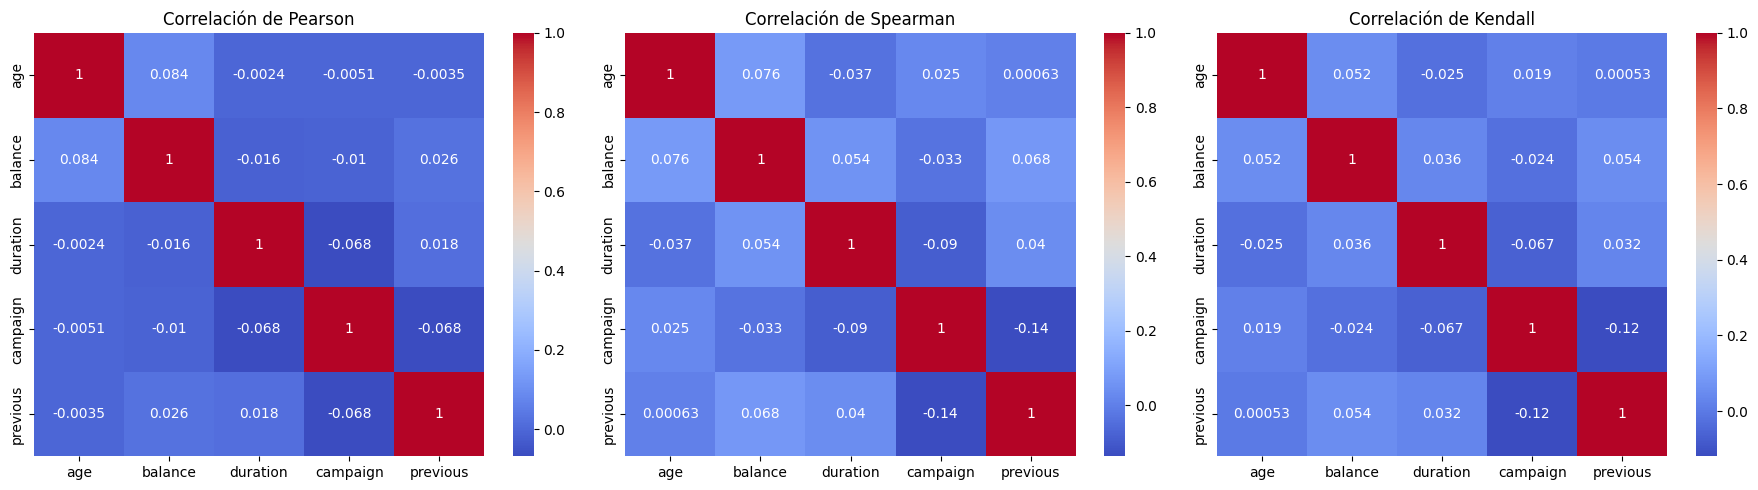

In [48]:
# Visualización con heatmaps
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(pearson_df, annot=True, cmap='coolwarm')
plt.title("Correlación de Pearson")

plt.subplot(1, 3, 2)
sns.heatmap(spearman_df, annot=True, cmap='coolwarm')
plt.title("Correlación de Spearman")

plt.subplot(1, 3, 3)
sns.heatmap(kendall_df, annot=True, cmap='coolwarm')
plt.title("Correlación de Kendall")

plt.tight_layout()
plt.show()

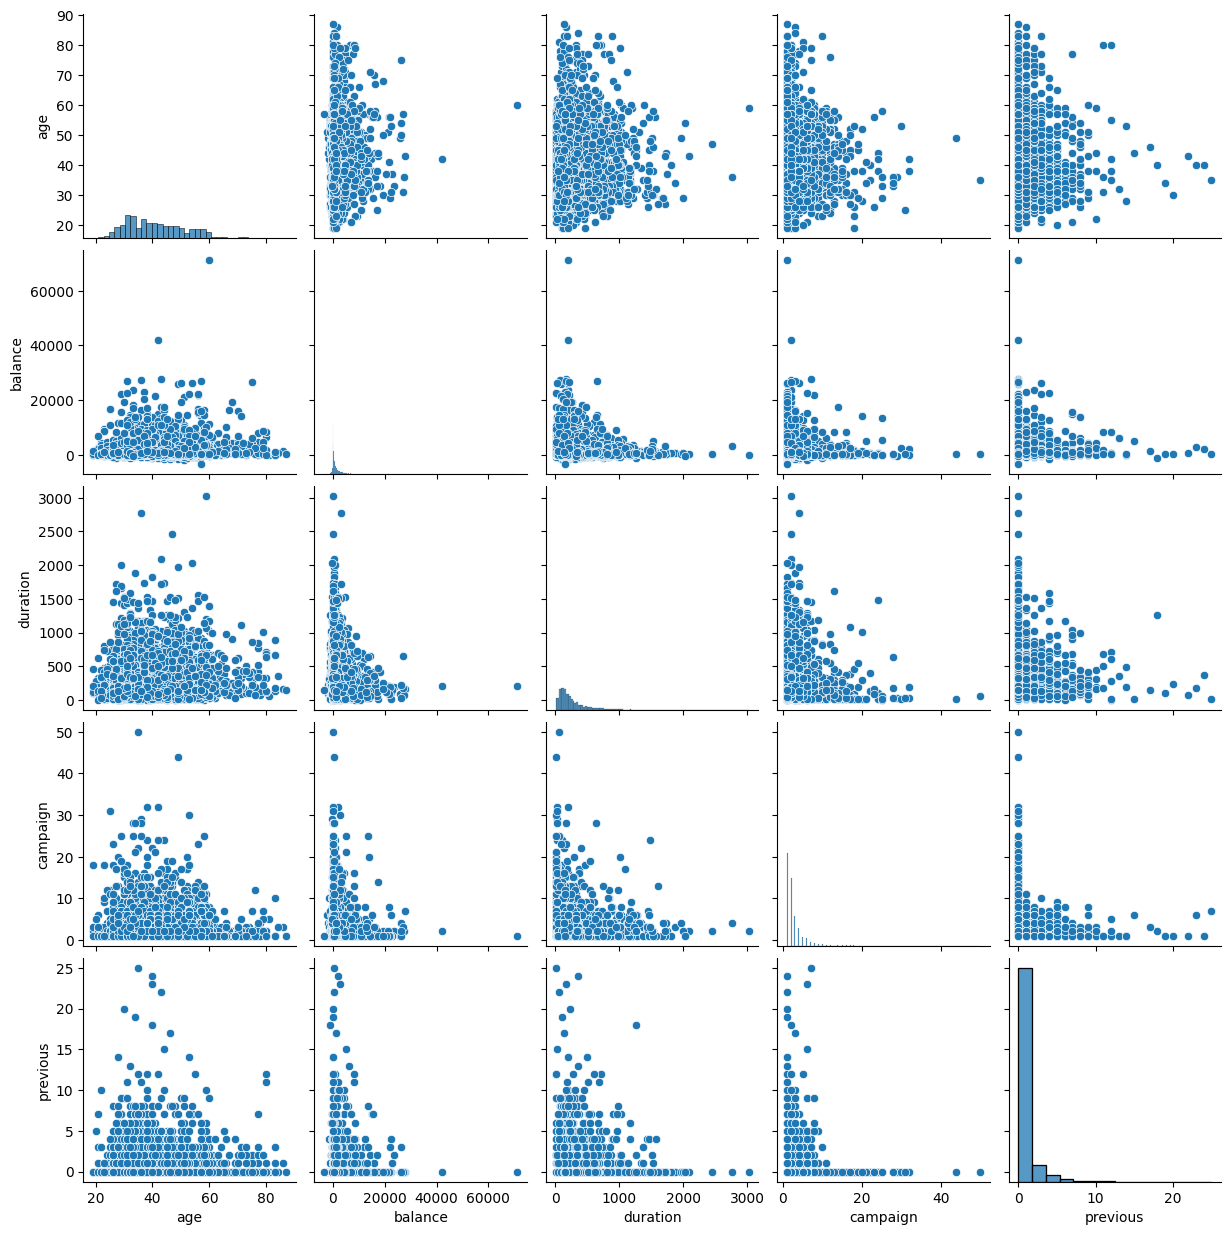

In [49]:
#VISUALIZACION DE DATOS
sns.pairplot(correlacion[variables])
plt.show()

#independencia


In [40]:
independencia.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


## Chi cuadrada


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(independencia['Formation'])
independencia['Formation'] = le.transform(independencia['Formation'])

In [44]:
independencia.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,1,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,1,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,1,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,1,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,1,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,1,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,1,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,1,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,1,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,1,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [45]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(independencia[['Facies', 'Formation']])

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.0
Dependent (reject H0)
